# Rotating edge experiment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection
from lineart.shapes import octahedron

# What is a line?

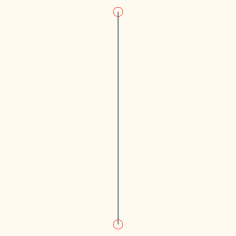

In [3]:
from flat import image


e_prime = EdgeCollection(np.array([[[50,5,0],[50,95,0]]]))
page = draw.quick_draw_edges(e_prime.edges, v=True, image_size=100)
Image(page.image(kind="rgba", ppi=60).png())

## Breaking and pushing a line

Stuff thats a bit harder to do IRL

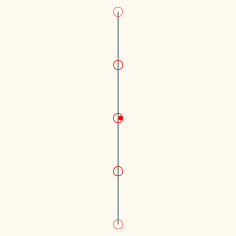

In [4]:
e_split = EdgeCollection(transform.uniform_split_edge(e_prime.edges[0],3))
push_point = [51,50, 0]
transform.point_push(e_split, 10,  np.array([push_point]), lin_scale=100, rot_scale=1)
page = draw.quick_draw_edges(e_split.edges, v=True)
page.place(style.full_red.circle(*push_point[:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

In [5]:
e_split.edges

array([[[50. , 95. ,  0. ],
        [50. , 72.5,  0. ]],

       [[50. , 72.5,  0. ],
        [50. , 50. ,  0. ]],

       [[50. , 50. ,  0. ],
        [50. , 27.5,  0. ]],

       [[50. , 27.5,  0. ],
        [50. ,  5. ,  0. ]]])

### Time and motion
biiiiig hassle to do by hand

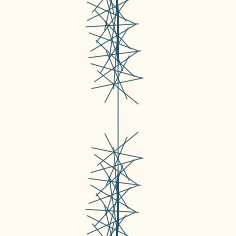

In [6]:

ec = e_split.copy()
page = draw.quick_draw_edges(ec.edges, v=False)

for i in range (25):
    ec.step(1)
    draw.quick_draw_edges(ec.edges, v=False, page=page)

Image(page.image(kind="rgba", ppi=60).png())

### Time over space, tiling!

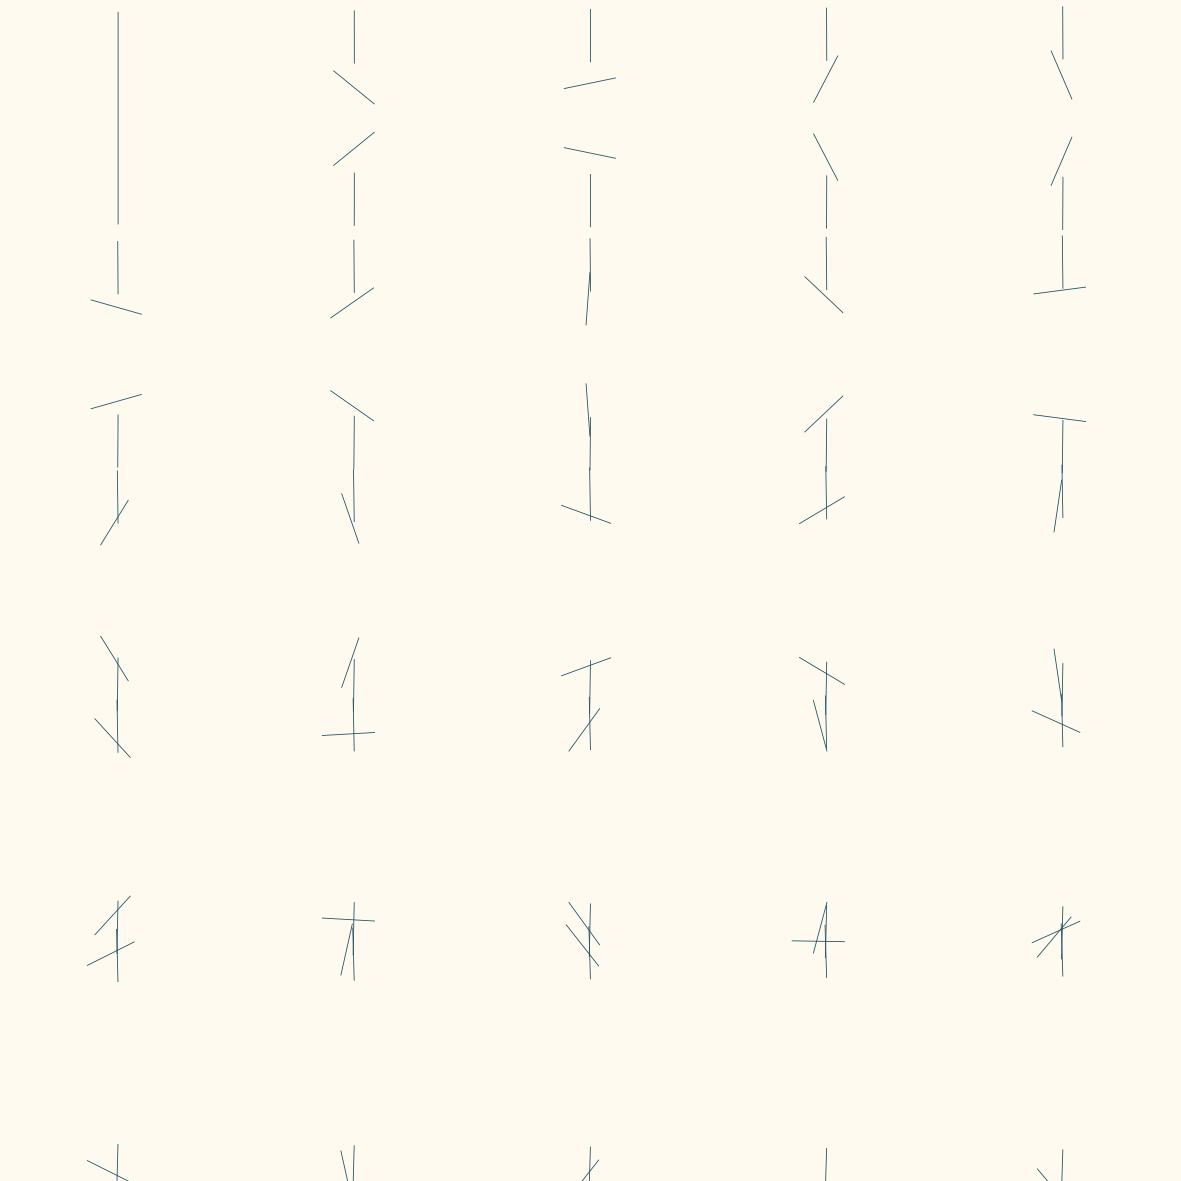

In [7]:
tiled_page, origins = draw.setup_tiled_page(n_tiles=(5,5),tile_size=(100,100))
ec = e_split.copy()
for i,j in itertools.product(range(5), repeat=2):

        draw.draw_edges_on_tile(
            ec.edges,
            j,
            i,
            page=tiled_page,
            origins=origins,
            v=False

        )
        ec.step(1)
Image(tiled_page.image(kind="rgba", ppi=60).png())

### Lets make a whole bunch of them
Scaling! one of the true magics of computers

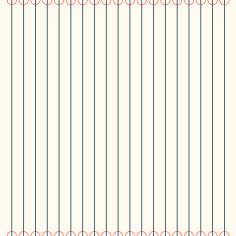

In [8]:
np.random.seed(42)
edges = np.array([[[x*5,0,0],[x*5,100,0]] for x in range(1,20)])

e_prime = EdgeCollection(edges)
page = draw.quick_draw_edges(e_prime.edges, v=True, image_size=100)
Image(page.image(kind="rgba", ppi=60).png())

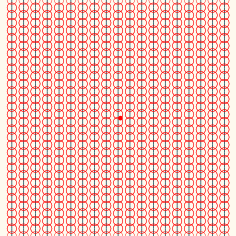

In [13]:

e_split = EdgeCollection(transform.uniform_split_edge(e_prime.edges[0],n_splits=30))
for e in e_prime.edges[1:]:
    e_split = e_split.combine(EdgeCollection(transform.uniform_split_edge(e ,n_splits=30)))

transform.point_push(e_split, force=400,  origin=np.array([[13,27, 0]]), lin_scale = 100, rot_scale=1)
# transform.point_push(e_split, force=10000,  origin=np.array([[99,99, -20]]), lin_scale = 100, rot_scale=1)
# transform.point_push(e_split, force=10000,  origin=np.array([[99,1, -20]]), lin_scale = 100, rot_scale=1)
# transform.point_push(e_split, force=10000,  origin=np.array([[1,99, -20]]), lin_scale = 100, rot_scale=1)
page = draw.quick_draw_edges(e_split.edges, v=True, image_size=100)
page.place(style.full_red.circle(*[51,50, 0][:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

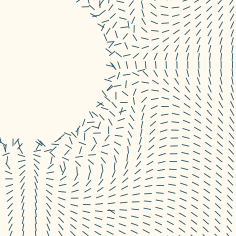

In [14]:

ec = e_split.copy()
# page = draw.quick_draw_edges(ec.edges, v=False)

for i in range(10):
    ec.step()
    page = draw.quick_draw_edges(ec.edges, v=False, image_size=100)
    # draw.page_save_iteration(page, name=f"shattered_verticals_{i:03d}", show=False, output_dir="../gif_outs/")
Image(page.image(kind="rgba", ppi=60).png())

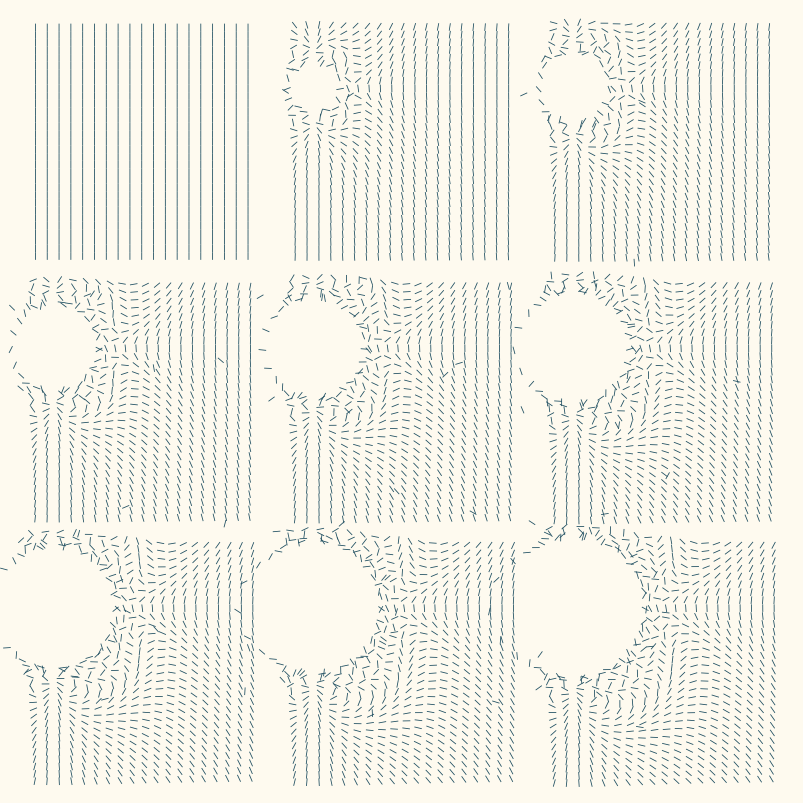

In [18]:
tiled_page, tile_origins = draw.setup_tiled_page(tile_size = (100, 100), n_tiles= (3,3), gap = (10,10))
ec = e_split.copy()
for i,j in itertools.product(range(3), range(3)):
        draw.draw_edges_on_tile(
            ec.edges,
            j,
            i,
            page=tiled_page,
            origins=tile_origins,
            v=False
        )
        ec.step()
draw.page_save_iteration(tiled_page, name="shattered_verticals", show=True)

## random time

100%|██████████| 25/25 [00:00<00:00, 80.66it/s]


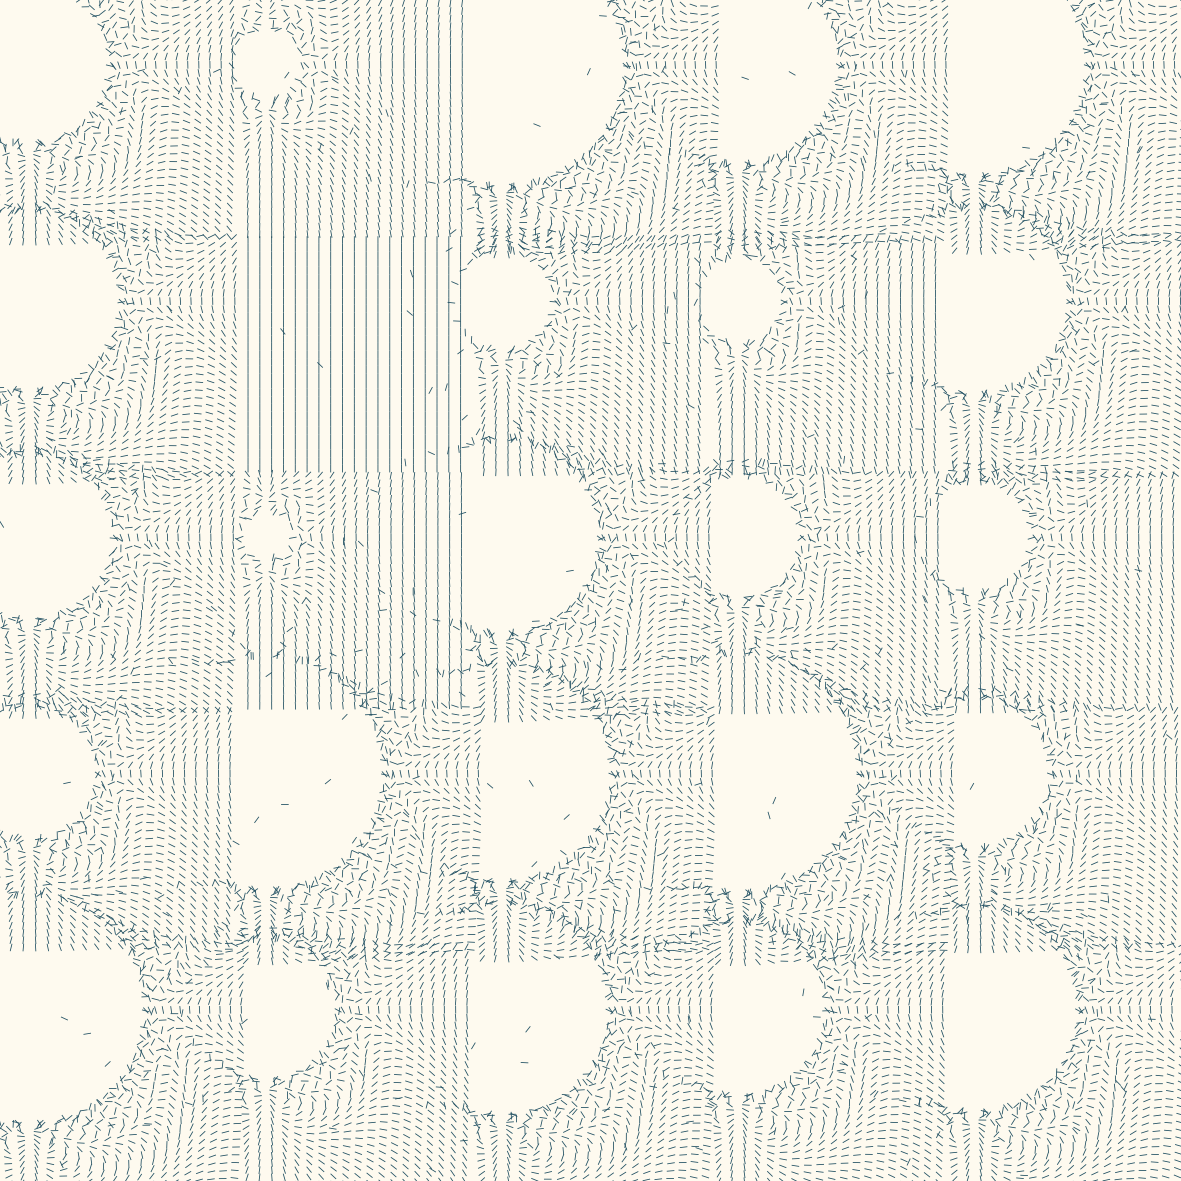

In [16]:
import random
from tqdm import tqdm


tiled_page, tile_origins = draw.setup_tiled_page(tile_size = (100, 100), n_tiles= (5,5), gap = (0,0))
ec = e_split.copy()
coords = list(itertools.product(range(5), range(5)))
random.shuffle(coords)
for i,j in tqdm(coords):
        draw.draw_edges_on_tile(
            ec.edges,
            j,
            i,
            page=tiled_page,
            origins=tile_origins,
            v=False
        )
        ec.step()
draw.page_save_iteration(tiled_page, name="shattered_verticals", show=True)